# Project 1

### Since this is just submitted for operation checking, I didn't note much of my motivations/specificities and my functions are unoptimized/heavily directed.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random as ran
plt.style.use('dark_background')

Mc on neighbors

In [150]:
def mc_nearby(n, beta, spin, energy, mag, sweeps):

    Exp = np.exp(-beta*np.arange(0,9))

    Es = np.zeros((sweeps,1))
    Ms = np.zeros((sweeps,1))
    for t in range(sweeps):
        for tt in range(n):
            j = ran.randint(0, n-1)
            s = spin[j]
            changes = spin[(j-1)%n]+spin[(j+1)%n]
            de = 2*s*changes

            if de < 0 or ran.random() < np.exp(-beta*np.abs(de)) :
                s *= -1
                energy += de
                mag += 2*s

            spin[j] = s

        Es[t], Ms[t] = energy, mag

    return Es, Ms, spin

In [151]:
N = 10
nt = 500
Ttop = 20
sweeps = 500 
T = np.linspace(.1,Ttop,nt)
spin = np.ones((N,1),dtype="int")
Energy = -N
Mag = N
sweeps = 1000
opar = np.zeros((nt,1))
op=np.zeros((nt,1))
opar2 = np.zeros((1,1))

In [48]:
for k in range(len(T)):
    temp = T[k]
    beta=1/temp
    E, M, spin = mc_nearby(N,beta,spin,Energy,Mag,sweeps) 
    Energy = E[-1]
    Mag = M[-1]
    opar[k]=np.abs(Mag)
    op[k]=Mag
    opar2=(opar)/N

Text(0, 0.5, 'Order Parameter')

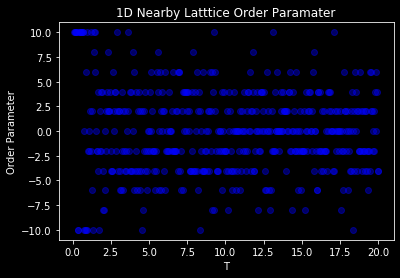

In [49]:
tx = np.linspace(.1,Ttop,nt)
plt.scatter(tx,op,c='b',alpha=.4)
#plt.scatter(tx,opar2,c="blue",alpha=.4)
#plt.plot(tx,opar,c='yellow',alpha=.4)
plt.title("1D Nearby Latttice Order Paramater")
plt.xlabel('T')
plt.ylabel('Order Parameter')

Exporting my changing N doc (note: might need to switch to "animation" and some variablees N if one wants to save it.)

In [ ]:
Nbot = 100
Ncount = 8
Ntop = 1000
Nrange = np.linspace(Nbot,Ntop,Ncount)

nt = 150
Ttop = 3
T = np.linspace(.1,Ttop,nt)

#for i in range(Ncount):
for i in range(1):
    #N = int(Nrange[i])
    N = 1500
    spin = np.ones((N,1))
    Energy = -N
    Mag = N
    sweeps = 500
    opar = np.zeros((nt,1))
    opar2 = np.zeros((1,1))
    for k in range(len(T)):
        temp = T[k]
        beta=1/temp
        E, M, spin = mc_nearby(N,beta,spin,Energy,Mag,sweeps) 
        Energy = E[-1]
        Mag = M[-1]
        opar[k]=np.abs(Mag)
    opar2=(opar)/N
    tx = np.linspace(.1,Ttop,nt)
    plt.figure()
    plt.scatter(tx,opar2,c="red",alpha=.4)
    plt.plot(tx,opar2,c='yellow',alpha=.4)
    plt.title("1D Nearby Latttice module mag/T high N: %s" % N)
    plt.xlabel('T')
    plt.ylabel('Avg Mag')
    plt.savefig('/Users/jackdienhart/Desktop/out2/o%f.png'% N)
    plt.close()

Same system as before - wouldn't have been hard at all to combine them, but it wasn't necessary for the projecct and our code wasn't meant to be partiularily optimized - I wanted to keep things seperate anyway

In [133]:
def mc2(n, beta,spin, energy, mag, sweeps):

    Es = np.zeros((sweeps,1))
    Ms = np.zeros((sweeps,1))
    for t in range(sweeps):
        for tt in range(n):
            j = ran.randint(0, n-1)
            s = spin[j]
            k = ran.randint(2, n-3)
            h = ran.randint(2, n-3)
            while (h==k):
                h = ran.randint(2,N-3)
            change = spin[(j-1)%n]+spin[(j+1)%n]+spin[(j+k)%n]+spin[(j+h)%n]
            
            de = 2*s*change
            
            if de < 0 or ran.random() < np.exp(-beta*np.abs(de)):
                s *= -1
                energy += de
                mag += 2*s
            spin[j] = s

        Es[t], Ms[t] = energy, mag

    return Es, Ms, spin

In [145]:
N = 250
nt = 300
Ttop = 5
T = np.linspace(.1,Ttop,nt)
spin = np.ones((N,1),dtype="int")
Energy = -N
Mag = N
sweeps = 1000
opar = np.zeros((nt,1))
op=np.zeros((nt,1))
opar2 = np.zeros((1,1))

In [146]:
for k in range(len(T)):
    temp = T[k]
    beta=1/temp
    E, M, spin = mc2(N,beta,spin,Energy,Mag,sweeps) 
    Energy = E[-1]
    Mag = M[-1]
    opar[k]=np.abs(Mag)
    op[k]=Mag
    opar2=(opar)/N

Text(0, 0.5, 'Order Parameter')

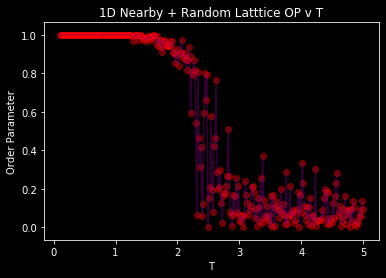

In [149]:
tx = np.linspace(.1,Ttop,nt)
#plt.scatter(tx,opar2,c="red",alpha=.4)
plt.scatter(tx,opar2,c="r",alpha=.4)
plt.plot(tx,opar2,c='purple',alpha=.4)
plt.title("1D Nearby + Random Latttice OP v T")
plt.xlabel('T')
plt.ylabel('Order Parameter')

Neighbor + Random Avg mag 

In [144]:
Nbot = 10
Ncount = 10
Ntop = 100
Nrange = np.linspace(Nbot,Ntop,Ncount)

nt = 150
Ttop = 5
T = np.linspace(.1,Ttop,nt)

for i in range(Ncount):
    N = int(Nrange[i])
    #N = 1500
    spin = np.ones((N,1),dtype="int")
    Energy = -N
    Mag = N
    sweeps = 500
    opar = np.zeros((nt,1))
    opar2 = np.zeros((1,1))
    for k in range(len(T)):
        temp = T[k]
        beta=1/temp
        E, M, spin = mc2(N,beta,spin,Energy,Mag,sweeps) #list of Energy and Magnetization
        Energy = E[-1]
        Mag = M[-1]
        opar[k]=np.abs(Mag)
    opar2=(opar)/N
    tx = np.linspace(.1,Ttop,nt)
    plt.figure()
    plt.scatter(tx,opar2,c="red",alpha=.4)
    plt.plot(tx,opar2,c='purple',alpha=.4)
    plt.title("1D + 2 Nearby Latttice Mag N: %s" % N)
    plt.xlabel('T')
    plt.ylabel('Avg Mag')
    plt.savefig('/Users/jackdienhart/Desktop/out4/m%s.png'% str(i))
    plt.close()
    plt.figure()
    plt.scatter(tx,opar,c="red",alpha=.4)
    plt.plot(tx,opar,c='purple',alpha=.4)
    plt.title("1D + 2 Nearby Latttice module mag/T  N: %s" % N)
    plt.xlabel('T')
    plt.ylabel('Avg Mag')
    plt.savefig('/Users/jackdienhart/Desktop/out4/a%s.png'% str(i))
    plt.close()

Exploring N correlation with T

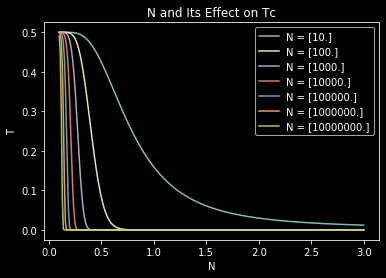

In [43]:
N = np.ones((7,1))
for i in range(0,7):
    N[i] = 10**(i+1)
temp = np.linspace(.1,3,300)
def prob(N):
    beta = 1/temp
    P_up = 0.5*((np.exp(beta))/(2*np.cosh(beta)))**(N-1)
    return P_up
plt.figure()
plt.title("N and Its Effect on Tc")
plt.xlabel("N")
plt.ylabel("T")
for i in range(len(N)):
    n = N[i]
    P_up = prob(n)
    plt.plot(temp,P_up, label = "N = %s" % str(N[i]),alpha=.9)
    plt.legend(loc="best")
plt.show()